In [1]:
#datetime index
#time resampling
#time shifting
#rolling and expanding
#time series visualization

In [2]:
#date time index
from datetime import datetime

In [3]:
my_year=2020
my_month=1
my_day=2
my_hour=13
my_min=30
my_sec=15

In [4]:
my_date=datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [6]:
my_date.hour

13

In [7]:
type(my_date)

datetime.datetime

In [8]:
import numpy as np

In [9]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [10]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]')

array(['2020-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [11]:
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [12]:
np.arange('2000','2018',dtype='datetime64[Y]')

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype='datetime64[Y]')

In [13]:
import pandas as pd

In [14]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('jan 01,2018',periods=7,freq='D')

In [17]:
pd.to_datetime(['2/1/2018','3/1/2018'],format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [18]:
pd.to_datetime(['2--1--2018','3--1--2018'],format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [19]:
data=np.random.randn(3,2)
cols=['A','B']
print(data)

[[-1.84021399  0.66032425]
 [-0.02808091 -0.17445591]
 [ 2.46081305 -0.85005847]]


In [20]:
idx=pd.date_range('2020-01-01',periods=3,freq='D')
df=pd.DataFrame(data,index=idx,columns=cols)

In [21]:
df.index


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [22]:
df.index.max()

Timestamp('2020-01-03 00:00:00')

In [23]:
df.index.argmax()

2

In [24]:
#time resampling
datas=np.random.rand(5,2)*100

In [25]:
pwd

'C:\\Users\\ASUS\\Desktop\\time series'

In [26]:
df=pd.read_csv('tser_lec/Data/starbucks.csv',index_col='Date',parse_dates=True)

In [27]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [28]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [29]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [30]:
df.resample(rule='A').std()

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [38]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [39]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [40]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


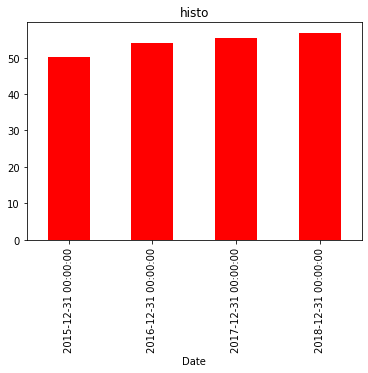

In [45]:
%matplotlib inline
title="histo"
df['Close'].resample('A').mean().plot.bar(title=title,color='red')

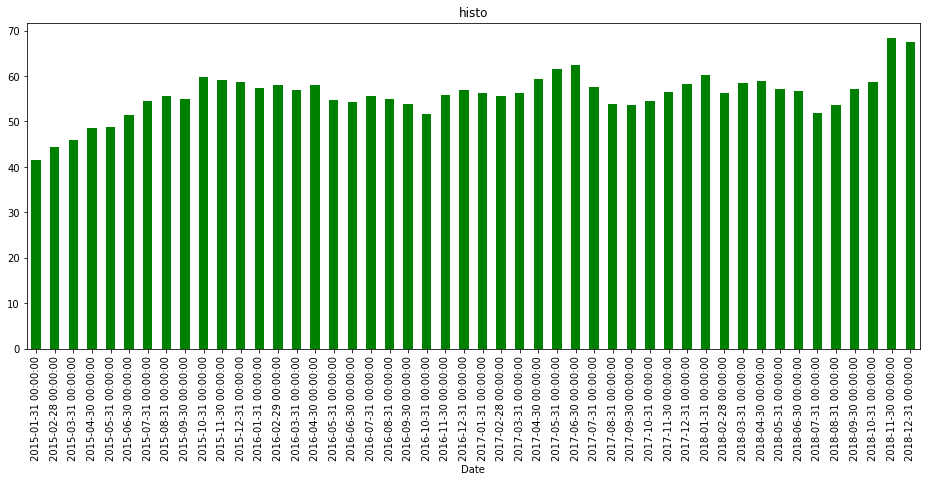

In [46]:
%matplotlib inline
title="histo"
df['Close'].resample('M').max().plot.bar(figsize=(16,6),title=title,color='green')

In [47]:
#time shifting
df=pd.read_csv('tser_lec/Data/starbucks.csv',index_col='Date',parse_dates=True)

In [48]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [49]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [54]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [53]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [56]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [58]:
#shift for 1 month

df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [59]:
#rollong and expanding
df=pd.read_csv('tser_lec/Data/starbucks.csv',index_col='Date',parse_dates=True)

In [60]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


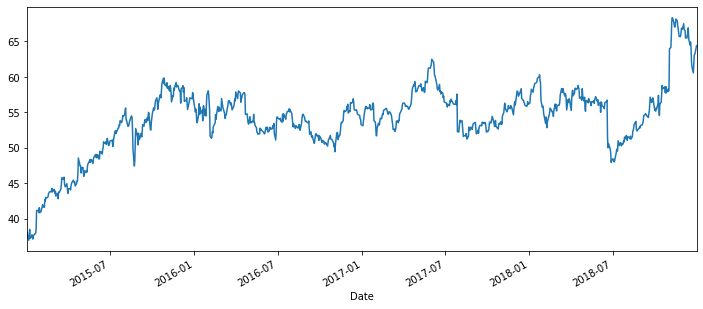

In [63]:
df['Close'].plot(figsize=(12,5))

In [64]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


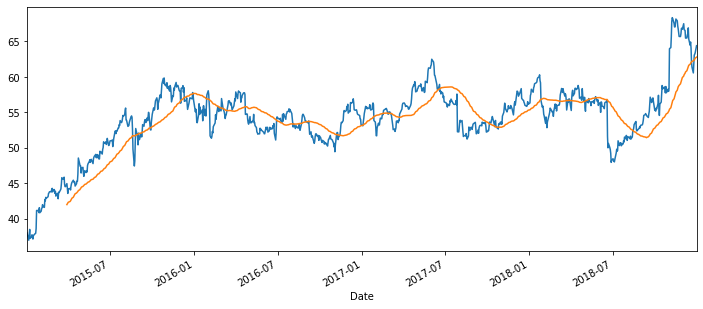

In [70]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

In [71]:
df['Close:30 day mean']=df['Close'].rolling(window=30).mean()

In [72]:
df

,Close,Volume,Close:30 day mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


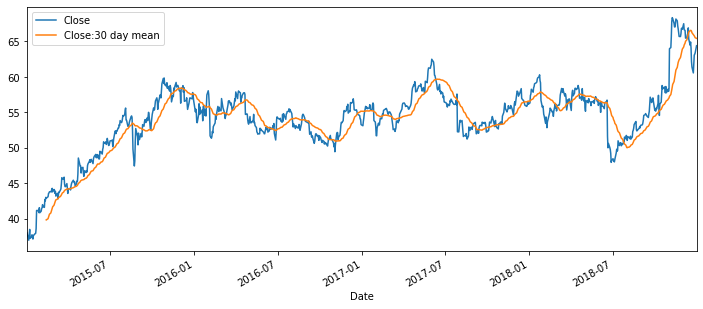

In [74]:
df[['Close','Close:30 day mean']].plot(figsize=(12,5))

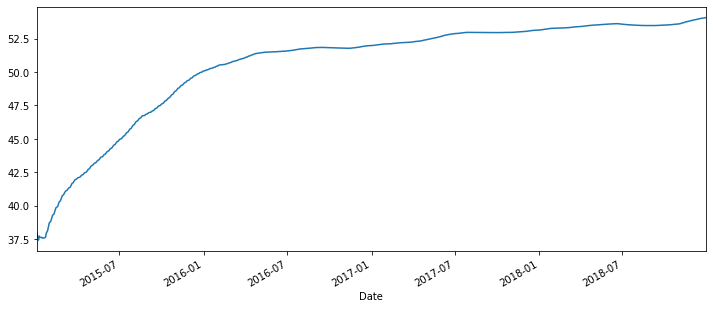

In [77]:
#expanding
df['Close'].expanding().mean().plot(figsize=(12,5))